# WeatherPy
----

### Analysis
* The temperature is warmer close to the equator. The southern hemisphere tends to be warmer this time of year than the northern hemisphere. The temperatures in the southern hemisphere were above 40 F while the temperatures in the northern hemisphere arranged as low as in the negative F degrees.
* There is no strong relationship between latitude and humidity but it appears that there's more cities in the northern hemisphere had reported higher humidity levels.
* There is no strong relationship between latitude and cloudiness. There are some clusters of cities that are far from the equator that have high percentage of cloudiness.
* There is no strong relationship between latitude and wind speed. The cities further away from the equator had higher reported wind speeds (up to 38 mph) while cities at the equator had wind speeds up to 15 mph.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# today's date
import datetime
today = datetime.datetime.now()
today_str = today.strftime("%m/%d/%y")
today_str

'03/25/19'

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [6]:
#subset_cities = cities[0:10]
#subset_cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# For temperature in Fahrenheit use units = imperial
# For temperature in Celsius use units = metric
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Store responses
found_cities = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval\n-----------------------------")
count=0
for city in cities:
    print(f"Processing Record {count} | {city}")
    try:
        response = requests.get(query_url + city).json()
        #print(query_url+city)
        #print(json.dumps(response, indent=4, sort_keys=True))
        found_cities.append(response['name']) 
        clouds.append(response['clouds']['all']) #cloudiness
        country.append(response['sys']['country']) #country
        date.append(response['dt']) #date
        humidity.append(response['main']['humidity']) #humidity
        lat.append(response['coord']['lat']) #lat
        lng.append(response['coord']['lon']) #lng
        max_temp.append(response['main']['temp_max']) #max temp
        wind_speed.append(response['wind']['speed']) #wind speed
    except Exception as err:
        print("City not found. Skipping...")
        #print(err)
    count= count+1
    
    
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 | ribeira grande
Processing Record 1 | qaanaaq
Processing Record 2 | tuktoyaktuk
Processing Record 3 | new norfolk
Processing Record 4 | tsihombe
City not found. Skipping...
Processing Record 5 | barrow
Processing Record 6 | komsomolskiy
Processing Record 7 | tasiilaq
Processing Record 8 | punta arenas
Processing Record 9 | jiexiu
Processing Record 10 | vanimo
Processing Record 11 | rungata
City not found. Skipping...
Processing Record 12 | hithadhoo
Processing Record 13 | severo-kurilsk
Processing Record 14 | brae
Processing Record 15 | jamestown
Processing Record 16 | walvis bay
Processing Record 17 | carnarvon
Processing Record 18 | rikitea
Processing Record 19 | iqaluit
Processing Record 20 | bluff
Processing Record 21 | ust-maya
Processing Record 22 | waipawa
Processing Record 23 | kaitangata
Processing Record 24 | haimen
Processing Record 25 | georgetown
Processing Record 26 | yellowknife
Processing Record

Processing Record 229 | kintampo
Processing Record 230 | ewa beach
Processing Record 231 | umm durman
City not found. Skipping...
Processing Record 232 | harper
Processing Record 233 | ilulissat
Processing Record 234 | luau
Processing Record 235 | kruisfontein
Processing Record 236 | bengkulu
City not found. Skipping...
Processing Record 237 | bereda
Processing Record 238 | roald
Processing Record 239 | senanga
Processing Record 240 | college
Processing Record 241 | clyde river
Processing Record 242 | mys shmidta
City not found. Skipping...
Processing Record 243 | lukulu
Processing Record 244 | rumboci
Processing Record 245 | mar del plata
Processing Record 246 | flagstaff
Processing Record 247 | kieta
Processing Record 248 | nelson
Processing Record 249 | gwembe
Processing Record 250 | yulara
Processing Record 251 | guerrero negro
Processing Record 252 | pokhara
Processing Record 253 | jinchengjiang
City not found. Skipping...
Processing Record 254 | rancho palos verdes
Processing Rec

Processing Record 453 | ilhabela
Processing Record 454 | hokitika
Processing Record 455 | najran
Processing Record 456 | sarangani
Processing Record 457 | korla
City not found. Skipping...
Processing Record 458 | narragansett
Processing Record 459 | bur gabo
City not found. Skipping...
Processing Record 460 | isahaya
Processing Record 461 | huron
Processing Record 462 | waingapu
Processing Record 463 | aracati
Processing Record 464 | gat
Processing Record 465 | eyl
Processing Record 466 | mount isa
Processing Record 467 | lydenburg
Processing Record 468 | gazanjyk
Processing Record 469 | kifri
Processing Record 470 | clonakilty
Processing Record 471 | saint-pierre
Processing Record 472 | marsh harbour
Processing Record 473 | bolungarvik
City not found. Skipping...
Processing Record 474 | valleyview
Processing Record 475 | khasan
Processing Record 476 | lakatoro
Processing Record 477 | sioux lookout
Processing Record 478 | bellevue
Processing Record 479 | homnabad
Processing Record 480 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_weather_dict = {
    "City": found_cities,
    "Cloudiness": clouds,
    "country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
}
city_weather_data = pd.DataFrame(city_weather_dict)
print(city_weather_data.count())
city_weather_data.head()

City          534
Cloudiness    534
country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64


,City,Cloudiness,country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ribeira Grande,20,PT,1553538600,82,38.52,-28.70,60.80,6.93
1,Qaanaaq,0,GL,1553540522,62,77.48,-69.36,-8.76,5.84
2,Tuktoyaktuk,90,CA,1553536800,85,69.44,-133.03,21.20,5.82
3,New Norfolk,40,AU,1553540535,43,-42.78,147.06,55.40,19.46
4,Barrow,92,AR,1553540542,66,-38.31,-60.23,60.55,11.54


In [9]:
city_weather_data.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

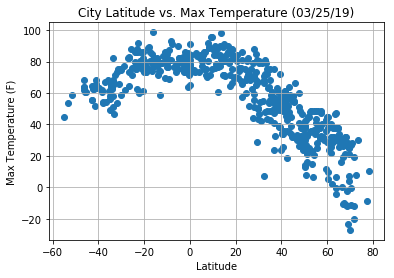

In [16]:
plt.scatter(city_weather_data["Lat"], city_weather_data["Max Temp"], marker="o")

plt.title(f"City Latitude vs. Max Temperature ({today_str})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latitude_vs_temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

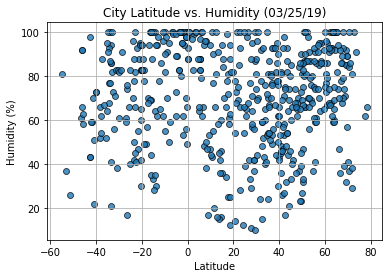

In [17]:
plt.scatter(city_weather_data["Lat"], city_weather_data["Humidity"], marker="o",
           alpha="0.8",edgecolors="black",linewidths="0.8")

plt.title(f"City Latitude vs. Humidity ({today_str})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latitude_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

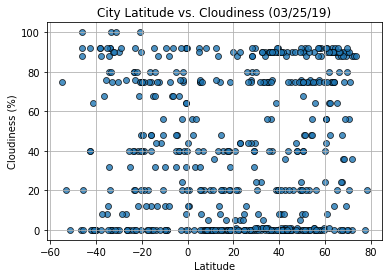

In [18]:
plt.scatter(city_weather_data["Lat"], city_weather_data["Cloudiness"], marker="o",
           alpha="0.8",edgecolors="black",linewidths="0.8")

plt.title(f"City Latitude vs. Cloudiness ({today_str})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latitude_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

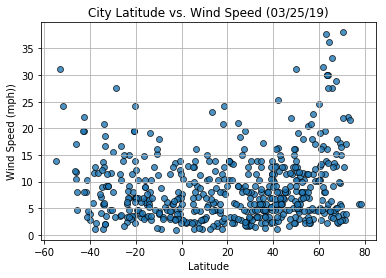

In [19]:
plt.scatter(city_weather_data["Lat"], city_weather_data["Wind Speed"], marker="o",
           alpha="0.8",edgecolors="black",linewidths="0.8")

plt.title(f"City Latitude vs. Wind Speed ({today_str})")
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latitude_vs_windspeed.png")
plt.show()